# Предварительная обработка данных

Познакомиться с основными приемами предварительной обработки и очистки данных.

In [ ]:
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Задания для выполнения
1. Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/Учёба/data/cars_sampled.csv')

In [ ]:
cars.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40


`dateCrawled`, `dateCreated`, `lastSeen` в формат даты + времени

In [ ]:
cars['dateCrawled'] = pd.to_datetime(cars.dateCrawled) 

In [ ]:
cars['dateCreated'] = pd.to_datetime(cars.dateCreated) 

In [ ]:
cars['lastSeen'] = pd.to_datetime(cars.lastSeen) 


2. Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.


In [ ]:
cars.shape

(50001, 19)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

In [ ]:
cars.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

**Столбцы с пустыми значениями**:

vehicleType            (5188),
gearbox                (2824),
model                  (2758),
fuelType               (4503),
notRepairedDamage      (9716)

In [ ]:
cars.nunique()

dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64

**Количество уникальных значений в столбцах**:

dateCrawled            (12039),
name                   (38766),
seller                     (2),
offerType                  (2),
price                   (2393),
abtest                     (2),
vehicleType                (8),
yearOfRegistration        (97),
gearbox                    (2),
powerPS                  (460),
model                    (248),
kilometer                 (13),
monthOfRegistration       (13),
fuelType                   (7),
brand                     (40),
notRepairedDamage          (2),
dateCreated               (75),
postalCode              (7018),
lastSeen               (10413)

3. Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [ ]:
cars[['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']].head(3)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
0,4450,2003,150,150000,3,20257
1,13299,2005,163,150000,6,88045
2,3200,2003,101,150000,11,27449


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

4. Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


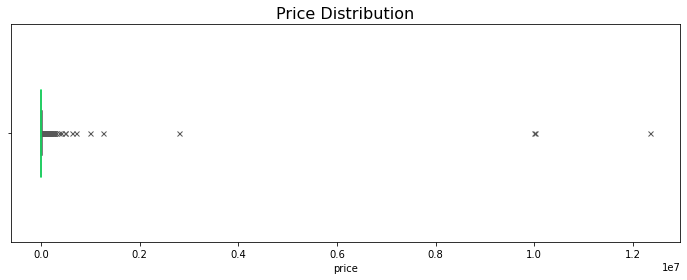

In [ ]:
plt.figure(figsize=(12, 4))
plt.title("Price Distribution",fontsize=16)
sns.boxplot(cars.price,
            width=0.4,
            flierprops={"marker": "x"},
            medianprops={"color": "#09E85E"},
            color='#2AFC98')
plt.show()

In [ ]:
cars.price.describe()

count    5.000100e+04
mean     6.559865e+03
std      8.581847e+04
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.190000e+03
max      1.234568e+07
Name: price, dtype: float64

In [ ]:
IQR = cars.price.quantile(0.75)-cars.price.quantile(0.25)
(cars.price.quantile(0.25) - IQR*1.5, cars.price.quantile(0.75) + IQR*1.5)

(-7910.0, 16250.0)

In [ ]:
cars = cars.loc[cars.price<=cars.price.quantile(0.75) + IQR*1.5]

In [ ]:
cars.price.describe()

count    46244.000000
mean      3986.167395
std       3849.316237
min          0.000000
25%       1000.000000
50%       2590.000000
75%       5900.000000
max      16250.000000
Name: price, dtype: float64

In [ ]:
cars.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


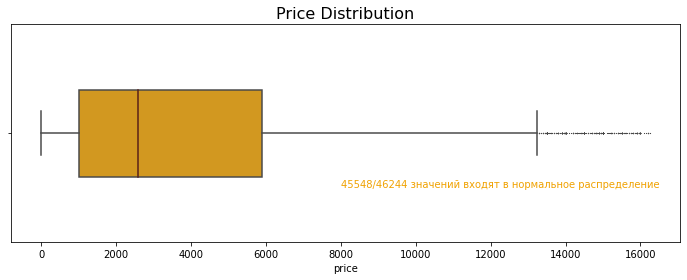

In [ ]:
plt.figure(figsize=(12, 4))
plt.title('Price Distribution',fontsize=16)
sns.boxplot(cars.price,
            width=0.4,
            fliersize=0.4,
            flierprops={"marker": "x"},
            medianprops={"color": "#581F18"},
            color='#F0A202')
plt.annotate(f'{len(cars.price[cars.price<=cars.price.quantile(0.75) + IQR*1.5])}/{len(cars.price)} значений входят в нормальное распределение',
             xy=(8000,0.25), color='#F0A202')
plt.show()

5. Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

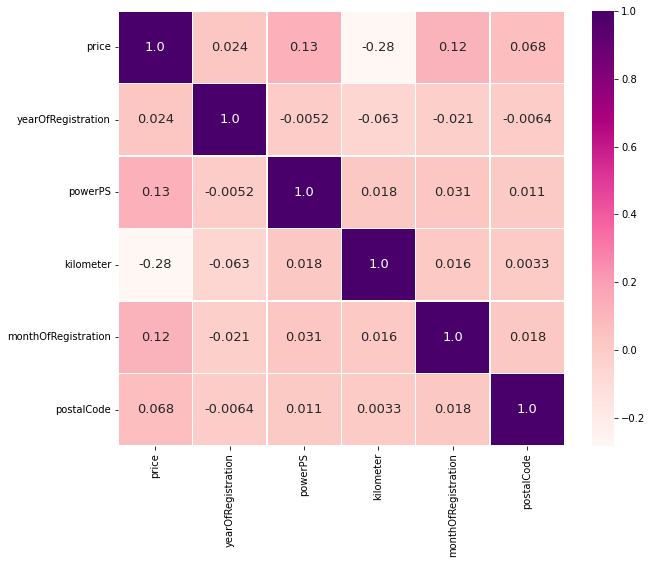

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cars.corr(), 
            linewidths=.5, 
            annot=True, 
            fmt='.2', 
            annot_kws={'fontsize':13}, 
            cmap='RdPu')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


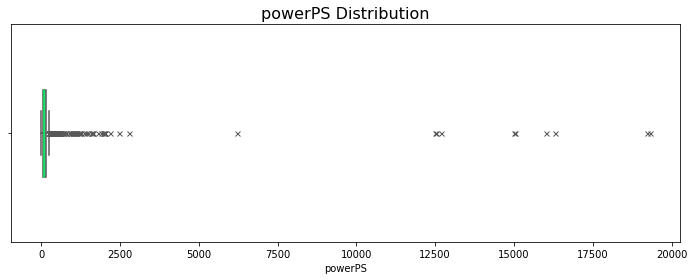

In [ ]:
plt.figure(figsize=(12, 4))
plt.title("powerPS Distribution",fontsize=16)
sns.boxplot(cars.powerPS,
            width=0.4,
            flierprops={"marker": "x"},
            medianprops={"color": "#09E85E"},
            color='#2AFC98')
plt.show()

In [ ]:
IQR = cars.powerPS.quantile(0.75)-cars.powerPS.quantile(0.25)
'Значений, не входящих в нормальное распределение: '+str(len(cars.powerPS[cars.powerPS>cars.powerPS.quantile(0.75) + IQR*1.5]))

'Значений, не входящих в нормальное распределение: 972'

In [ ]:
cars = cars.loc[cars.powerPS<=cars.powerPS.quantile(0.75) + IQR*1.5]

In [ ]:
cars.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


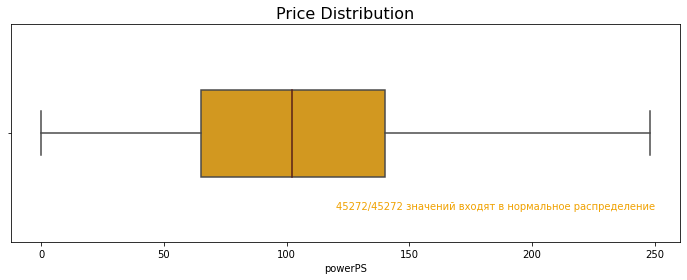

In [ ]:
plt.figure(figsize=(12, 4))
plt.title('Price Distribution',fontsize=16)
sns.boxplot(cars.powerPS,
            width=0.4,
            fliersize=0.4,
            flierprops={"marker": "x"},
            medianprops={"color": "#581F18"},
            color='#F0A202')
plt.annotate(f'{len(cars.powerPS[cars.powerPS<=cars.powerPS.quantile(0.75)+(cars.powerPS.quantile(0.75)-cars.powerPS.quantile(0.25))*1.5])}/{len(cars.powerPS)} значений входят в нормальное распределение',
             xy=(120,0.35), color='#F0A202')
plt.show()

In [ ]:
cars.powerPS.describe()

count    45272.000000
mean       100.367821
std         55.922012
min          0.000000
25%         65.000000
50%        102.000000
75%        140.000000
max        248.000000
Name: powerPS, dtype: float64

6. Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

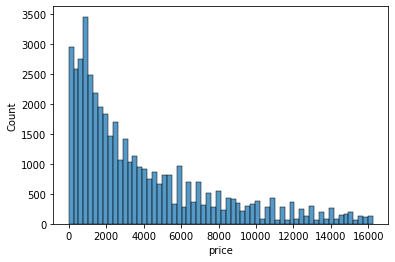

In [ ]:
sns.histplot(cars.price)

In [ ]:
cars[['price','gearbox', 'fuelType', 'vehicleType', 'notRepairedDamage']].head(3)

,price,gearbox,fuelType,vehicleType,notRepairedDamage
0,4450,manual,diesel,limousine,NaN
1,13299,manual,diesel,suv,no
2,3200,manual,diesel,bus,NaN


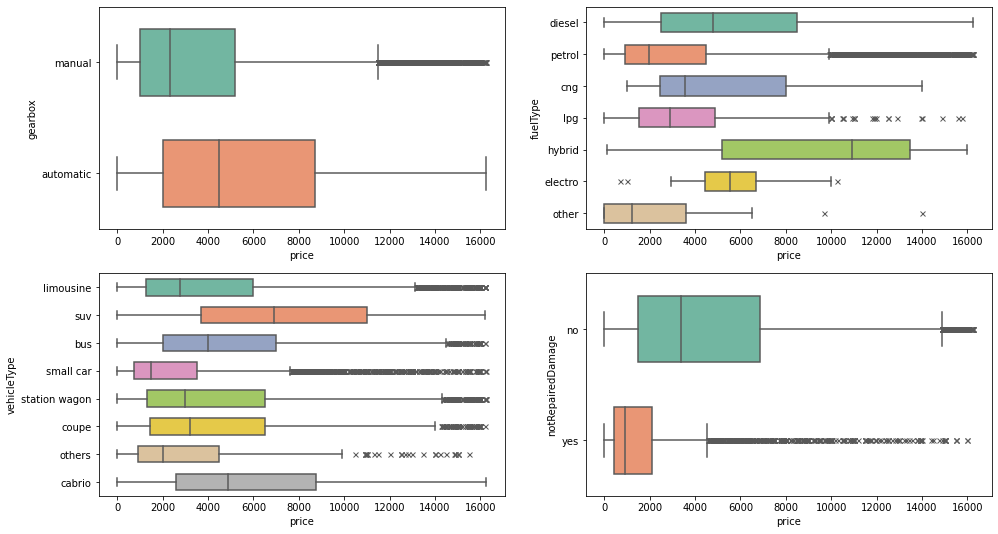

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
sns.boxplot(x=cars.price, y=cars.gearbox, palette='Set2', width=0.6, flierprops={"marker": "x"}, ax=axes[0][0])
sns.boxplot(x=cars.price, y=cars.fuelType, palette='Set2', width=0.6, flierprops={"marker": "x"}, ax=axes[0][1])
sns.boxplot(x=cars.price, y=cars.vehicleType, palette='Set2', width=0.6, flierprops={"marker": "x"}, ax=axes[1][0])
sns.boxplot(x=cars.price, y=cars.notRepairedDamage, palette='Set2', width=0.6, flierprops={"marker": "x"}, ax=axes[1][1])
plt.show()

$\text{1. На автоматическую коробку передач в среднем цена выше, чем на ручную, а также, для РКП выбросов гораздо больше}$
$\text{2. Равноменее всего расположена цена на автомобили с гибридным типом топлива, наибольшее среднее значение цен на электрокары.}$
$\text{Больше всего выбросов цен на авто с бензин в качестве топлива.}$
$\text{3. Равноменее всего расположена цена на внедорожники, на них же наибольшее среднее значение цен. Больше всего аномальных цен для маленьких автомобилей}$
$\text{4. На автомобили без неремонтируемых повреждений в среднем цена выше, чем на ручную, для авто с неремонтируемыми повреждениями выбросов гораздо больше}$

In [ ]:
cars[['price','fuelType']].groupby(by="fuelType").count().T.apply(lambda x: round(x/(len(cars.fuelType) - cars.fuelType.isna().sum()),4)*100)

fuelType,cng,diesel,electro,hybrid,lpg,other,petrol
price,0.2,30.04,0.03,0.06,1.65,0.06,67.96


In [ ]:
cars[['price','vehicleType']].groupby(by="vehicleType").count().T.apply(lambda x: round(x/(len(cars.vehicleType) - cars.vehicleType.isna().sum()),4)*100)

vehicleType,bus,cabrio,coupe,limousine,others,small car,station wagon,suv
price,9.1,6.13,4.58,28.82,1.05,26.49,20.44,3.38


7. Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [ ]:
frequency_isna = pd.DataFrame(cars.isna().sum().apply(lambda x: round(x/len(cars)*100,2)), columns=['frequency'])
frequency_isna[frequency_isna.frequency>0]

,frequency
vehicleType,11.16
gearbox,6.03
model,5.54
fuelType,9.54
notRepairedDamage,20.68


In [ ]:
cars.drop(columns=['vehicleType','notRepairedDamage'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cars.gearbox.fillna(cars.gearbox.mode().values[0], inplace=True)
cars.gearbox.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

In [ ]:
cars.model.fillna(cars.model.mode().values[0], inplace=True)
cars.model.isna().sum()

0

In [ ]:
cars.fuelType.fillna(cars.fuelType.mode().values[0], inplace=True)
cars.fuelType.isna().sum()

0

In [ ]:
cars.isna().sum().sum()

0

8. Сохраните полученный датасет и выведете его.

In [ ]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,2003,manual,150,3er,150000,3,diesel,bmw,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,2005,manual,163,xc_reihe,150000,6,diesel,volvo,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,2003,manual,101,touran,150000,11,diesel,volkswagen,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,2006,manual,86,ibiza,60000,12,petrol,seat,2016-03-19,34537,2016-07-04 04:44:00
5,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,1995,manual,90,passat,150000,2,petrol,volkswagen,2016-02-04,26826,2016-02-04 12:51:00


9. Постройте модель регрессии для цены автомобиля. Обучите ее на данных, полученных из исходного датасета с применением разных методов заполнения пропущенных значений. Сделайте вывод об эффективности разных методов.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
cars_raw = pd.read_csv('/content/drive/MyDrive/Учёба/data/cars_sampled.csv')

In [ ]:
X = cars[['seller','offerType','abtest','yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand']]
Y = cars.price

In [ ]:
def fillna(par):
   cars_raw[par] = cars_raw[par].fillna(cars_raw[par].mode)

In [ ]:
[fillna(x) for x in np.array(['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage'])]

[None, None, None, None, None]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model_1.predict(X_test)

In [ ]:
model_1.intercept_, model_1.coef_

(6875.470238876767,
 array([ 2.38839076e-01,  2.52107472e+01, -4.00340750e-02,  3.76233340e+01,
         2.52669645e+02, -2.52669645e+02,  1.24459853e+02, -1.24459853e+02,
         8.44291539e-01, -8.44291539e-01,  2.89736886e+02, -2.89736886e+02,
         8.02070376e+02,  8.30835280e+02, -5.62244367e+02,  2.94711833e+03,
        -1.47069526e+03, -1.13579702e+03, -1.41128733e+03, -9.98691074e+02,
         6.27199404e+02,  6.92382172e+02,  1.87034323e+02, -3.62770465e+02,
        -4.45483893e+02,  7.05620270e+02, -1.22824419e+03, -6.10261859e+02,
        -4.43659297e+02, -6.07927516e+02, -1.59705828e+01,  4.45809144e+02,
        -2.87435074e+02,  7.24146869e+02, -3.92793402e+02, -1.58453985e+03,
        -4.14771389e+02,  2.83881091e+03, -2.33587116e+02,  3.13802791e+02,
         3.45759226e+03, -8.15766962e+02,  1.88308175e+02, -6.26145845e+02,
        -5.40658060e+02,  2.74831484e+03, -6.71980616e+02, -1.84518479e+03,
        -1.02714360e+02,  2.02907455e+02,  1.14191925e+03, -6.198966

In [ ]:
list(zip([model_1.score(X_test, Y_test),
np.mean(abs(Y_pred-Y_test)),
np.sqrt(np.mean((Y_pred-Y_test)**2)),
np.mean(abs(Y_pred-Y_test))/np.mean(abs(Y_test-np.mean(Y_test))),
np.mean((Y_pred-Y_test)**2)/np.mean((Y_test-np.mean(Y_test))**2)],['R^2','MAE', 'RMSE','RAE','RSE']))

[(0.4300040033605501, 'R^2'),
 (2097.7213598794356, 'MAE'),
 (2825.6154886056156, 'RMSE'),
 (0.7082794165427836, 'RAE'),
 (0.5699959966394499, 'RSE')]